# A Brief Introduction to Parameter Estimation the Bayesian way

In engineering and science data analysis we often want to find the values of parameters in a model that best fit the data. A common example is fitting the slope and intercept in a straight line model. This chapter introduces how Bayes' theorem can be used to achieve this parameter estimation. The examples used are chosen to make the process clear.

## A first application of Bayes' Theorem – the fair coin

The first draft of these notes is being written at the time of the inaugral Las Vegas F1 Grand Prix (the street circuit, not the infamous cruise round the casino car-park of the early 1980s) so it seems apt to consider the fair coin problem.

On a visit to Las Vegas you are presented with a coin, it looks a little odd so you ask yourself the question "What is the probability that this coin is fair?" A fair coin is one that when tossed is unbiased - a long run of coin tosses will given on average the same number of heads (H) as tails (T).

In the following we will deal with the proportionality {eq}`bayesprop` as this will allow us to see the bayesian updating process in action without overally complex computations being required. This is fine because the denominator of equation {eq}`bayes` provides normalisation so the optimum value of a parameter will not be affected.

We begin by considering the model, or hypothesis, that we are interested in assessing. All we know is that the coin is from Las Vegas so there is a chance it may be biased - the proportion of heads generated by flipping the coin could vary from 0 (all tails) to 1 (all heads). We can model this in terms of a set of hypotheses that cover this range $H_i$ (monotonically) and ask which of these is the most likely, $H_0$? If we then take a set of flips of the coin (data) we can find out which of the $H_i$ best matches the data i.e. $H_0$. A $H_0$ value of $0.5$ corresponds to a completely fair coin.  

It can be shown that that if the flips of the coin are independent the probability of obtaining $R$ heads in $N$ is given by:

$$ \mathrm{prob}(\{data\}|H,I)\propto H^R(1-H)^{N-R}$$(flipProb)

This is a binomial distribution. It can be shown that this is the correct form for this probability. Wikipedia probably has a page on this should you feel the need to confirm this. However, hopefully it looks reasonable to you. $H$ is the probability of getting a head and there are $R$ of them and it follows that $(1-H)$ is the propability of getting a tail of which there have been $(N-R)$. 

We also need a *prior* for our model. Before any flips of the coin are made we have no reason to favour any particular value for $H$ so could reasonably apply the same probability to each - this is known as a flat, or noninformative, prior–see plot below. In forthcoming calculations the range of $H_i$ will be divided up into 100 segments - the flat prior value has been chosen so that the total probability will sum to one.

Text(0, 0.5, 'Prior probability density')

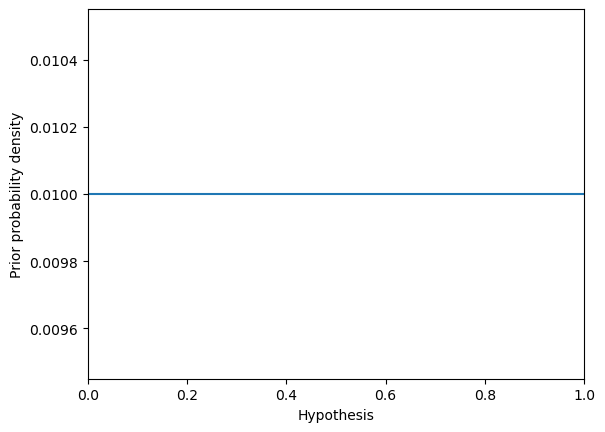

In [1]:
# Plot of prior for fair coin problem
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats



fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([0,1],[0.01,0.01])  # Plot prior on the axes.
ax.set_xlim(0, 1)
ax.set_xlabel('Hypothesis')
ax.set_ylabel('Prior probability density')
#plt.show()

Let's assume the coin is tossed and returns a head. This means we have 1 head in 1 flip of the coin and equation {eq}`flipProb` gives us:

$$\textrm{p}(\{\textrm{data=`H`\},|H,I})\propto H$$

The product of this with our flat prior probability will give us the posterior probability. This will be $\propto H$ - a straight line starting from zero (probability of only tails) and reaching a maximum at $H=1$ (probability of only heads). This tells us that the coin is most likely one that always gives heads, but it is not stongly in favour of this model.

Text(0, 0.5, 'Probability')

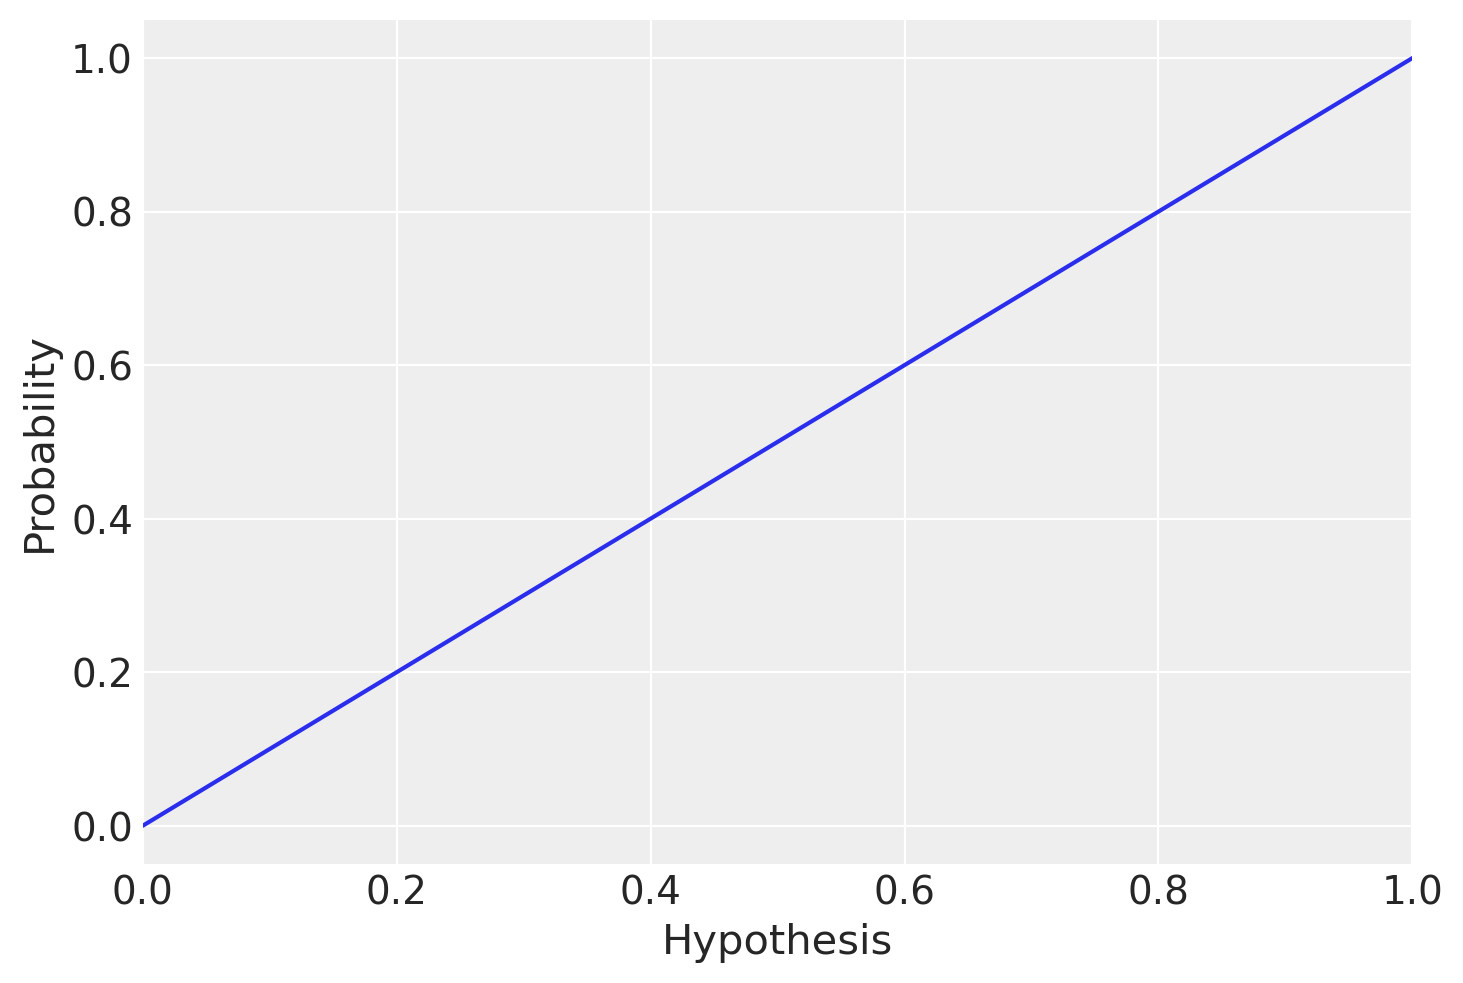

In [2]:
%config InlineBackend.figure_format = 'retina'
success_true = 0.3 # this is the "true" value for the odds of the coin giving a head

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

grid_points = 100 # use lower number for testing

def uniform_prior(grid_points):
    """
    Returns Uniform prior density

            Parameters:
                grid_points (numpy.array): Array of prior values

            Returns:
                density (numpy.array): Uniform density of prior values
    """
    return np.repeat(1, grid_points)


# define grid
p_grid = np.linspace(0, 1, grid_points) # these are the x values

# define prior
prior = uniform_prior(grid_points) # y values 

# compute likelihood at each point in the grid
# For single toss that gives 1 head, binomial function gives likelihood = H
# compute product of likelihood and prior
#unstd_posterior = likelihood * prior
likelihood = p_grid*prior
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
#posterior = unstd_posterior / unstd_posterior.sum()
#return p_grid, posterior
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(p_grid,unstd_posterior)  # Plot prior on the axes.
ax.set_xlim(0, 1)
ax.set_xlabel('Hypothesis')
ax.set_ylabel('Probability')

A second coin toss also gives a head. Now we have $N=2$ and $R=2$ for {eq}`flipProb` and the prior is now $H$. The product of these gives us $\textrm{prob}\propto H^2$. This is even more strongly in favour of the heads-only scenario–this is not unreasonable as at this stage we have no data to indicate that there is even a tail side to the coin. This is shown below in the left plot. If the third toss of the coin results in a tail then the right hand plot results. Notice that $H=1$ is no longer possible as we know that the coin can generate tails as well as heads

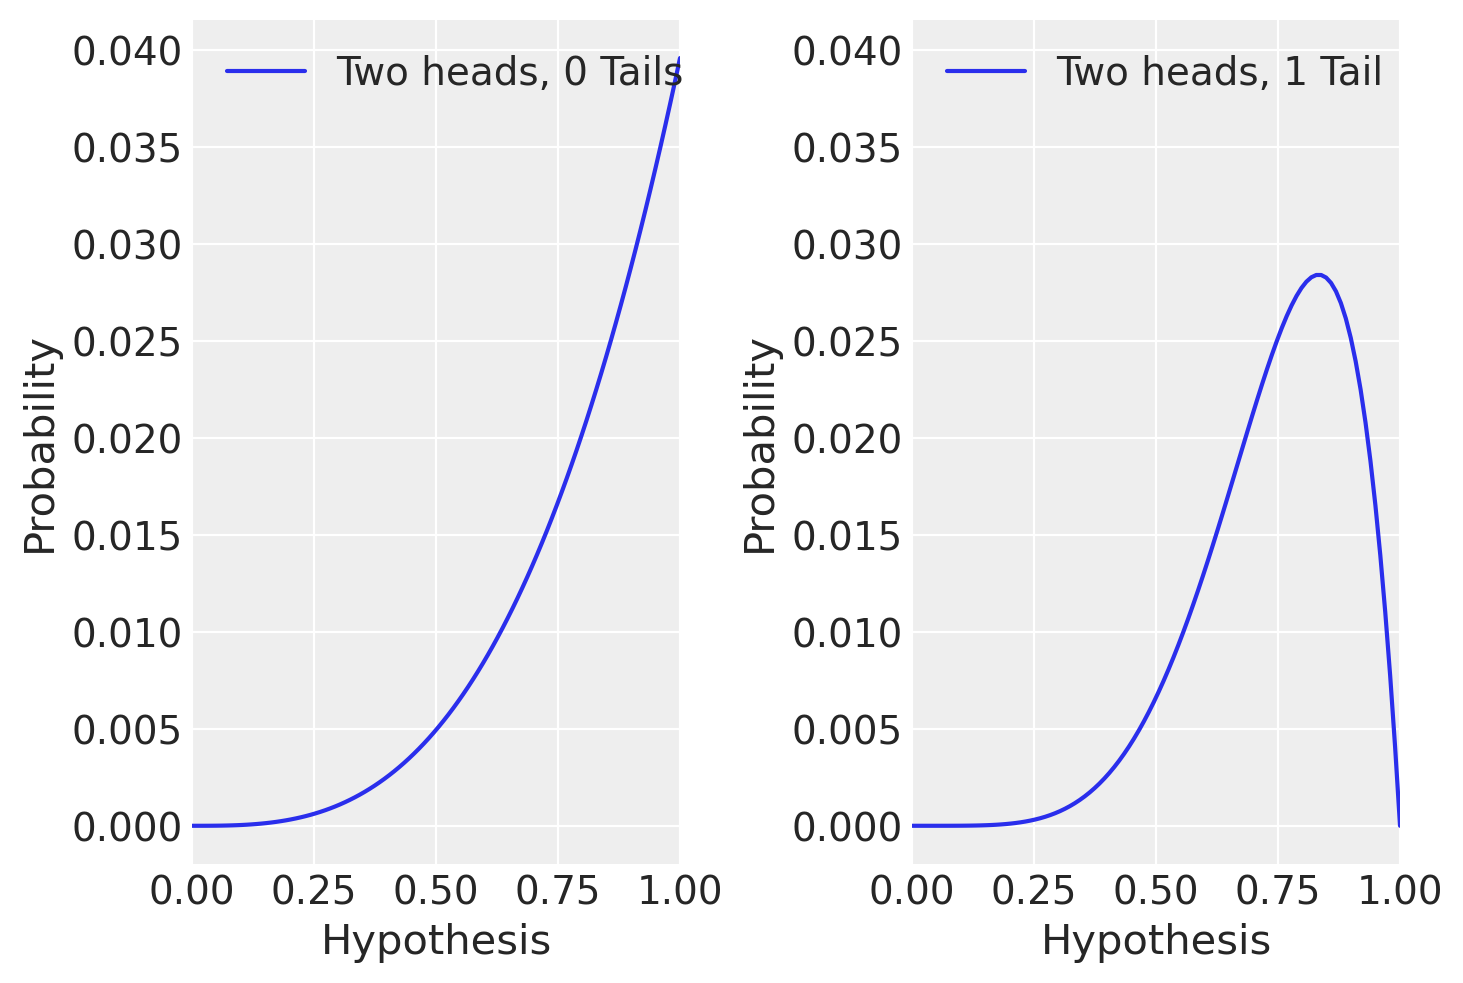

In [3]:
az.style.use("arviz-darkgrid")

grid_points = 100 # use lower number for testing

def uniform_prior(grid_points):
    """
    Returns Uniform prior density

            Parameters:
                grid_points (numpy.array): Array of prior values

            Returns:
                density (numpy.array): Uniform density of prior values
    """
    return np.repeat(1, grid_points)


# define grid
p_grid = np.linspace(0, 1, grid_points) # these are the x values

# define prior
prior = uniform_prior(grid_points) # y values 

# compute likelihood at each point in the grid
# For single toss that gives 1 head, binomial function gives likelihood = H
# compute product of likelihood and prior
#unstd_posterior = likelihood * prior
likelihood = p_grid*prior
unstd_posterior = likelihood * prior

prior = unstd_posterior.copy() # old posterior becomes new prior

likelihood = stats.binom.pmf(2, n=2, p=p_grid)
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
#return p_grid, posterior
fig, (ax1, ax2) = plt.subplots(1,2)  # Create a figure containing a single axes.
ax1.plot(p_grid,posterior, label='Two heads, 0 Tails')  # Plot prior on the axes.
ax1.set_xlim(0, 1)
ax1.set_xlabel('Hypothesis')
ax1.set_ylabel('Probability')
ax1.legend(loc="upper left")

# Now add in a tail
prior = unstd_posterior.copy() # old posterior becomes new prior
likelihood = stats.binom.pmf(2, n=3, p=p_grid)
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
#return p_grid, posterior

ax2.plot(p_grid,posterior, label='Two heads, 1 Tail')  # Plot prior on the axes.
ax2.set_xlim(0, 1)
ax2.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1]) # make plots have same range
ax2.set_xlabel('Hypothesis')
ax2.set_ylabel('Probability')
ax2.legend(loc="upper left")

The next figure shows what happens as the number of draws increases from 1 to just over 1000. Notice that the peak probability value converges towards $~0.3$ - this is the value chosen for this simulation.

```{figure} NCoinFlips.png
---
name: flips-fig
---
Development of Posterior Probability as number of coin flips increase from 1 to 1024. 
```
The code used to generate {numref}`Figure {number} <flips-fig>` is given at the end of this chapter. You could use it to explore the impact of the prior probability on the outcome. A good starting place is to assume that the coin is at least close to fair and use a normal distribution centred on $H=0.5$. After all, even in Las Vegas two-headed coins are rare.

## Summary statistics
Pictoral summaries of results such as those in {numref}`Figure {number} <flips-fig>` are great, but often we want a short summary of the results – factors such as the expected value (best estimate), the standard deviation and a confidence interval.

### Best estimates
Using the notation from the coin flipping case we want to find the $H$ that corresponds to the maximum probability. This best estimate $H_0$ occurs where:

$$\frac{dP}{d H}\biggr\rvert_{H_0} = 0$$(1stderiv)

(note, strictly we also require that the 2nd derivative is less than zero at this point to ensure that we are at a maximum).

### Reliability of fits
This is a measure of the width/spread of the distribution around $H_0$. If this is narrow then we can be reasonably confident that we have a reliable measure of the parameter(s) and $H_0$ otherwise we should treat the model with caution. 

A useful approach is to consider a Taylor expansion of the posterior probability distribution around $H_0$. This expansion gives a way to treat the local behavior of the function as a low-order polynomial. Now, the coin flipping example has a reasonable straightforward posterior distribution, but in general this will not be the case and the form of the distribution is likely to be complex. In order to minimise the impact of this structure it is conventional to work with the logarithm $L$ which is a slower changing function. The Taylor expansion of $L$ around $H_0$ and neglecting terms higher than the second derivative is:

$$L = L(H_0) + \frac{1}{2}\frac{d^2L}{dH^2}\biggr\rvert_{H_0}(H-H_0)^2$$(TaylorL)

Only the second term on the right hand side contributes to the shape of this function. Taking the exponential of equation {eq}`TaylorL` gives:

$$P(H|{data},I) \approx A\exp\left(\frac{1}{2}\frac{d^2L}{d\theta^2}\biggr\rvert_{H_0}(H-H_0)^2\right)$$

Thus, if higher order terms in equation {eq}`TaylorL` can be neglected then the posterior probability function can be approximated by a normal distribution with a standard deviation given by:

$$\sigma = \left(-\frac{d^2L}{2dH^2}\biggr\rvert_{H_0}\right)$$

The above is presented for the coin flipping model, but the same analysis applies to a broad range of data/models.

```{admonition} Exercise
:class: dropdown
Show that for the coin example:

$$H_0=\frac{R}{N}$$

and 

$$\sigma = \sqrt{\frac{H_0(1-H_0)}{N}}$$
```
### Mean, mode, and median
The mean, mode, and median are examples of point estimates of the most likely value for the parameter according to the posterior probability density (distribution). In the coin flipping example these estimates converge when there is a sufficient amount of data. However, early in the process illustrated in {numref}`Figure {number} <flips-fig>` this is not the case. Indeed for many real-life situations, particularly when there is a small amount of data, these estimates will not coincide and a decision often has to be made as to which to report. Ben Lambert recomends the following hierarchy{cite}`a-lambertStudentGuideBayesian2018`:

* Mean: $E(\theta|data)=\int\theta prob(\theta|data)d\theta$
* Median: $\widetilde{\theta}$ such that $\frac{1}{2}=\int_{-\infty}^{\widetilde{\theta}}prob(\theta|y)d\theta$
* Mode: $\theta_M \equiv \arg\{\max_\theta[prob(\theta|y)]\}$

### Credible intervals
In standard statistic the confidence interval is often used as a measure of the uncertainty of the value of our point estimate. However, these are problematic to calculate and there is often confusion over what they mean. Bayesian methods allow an alternative measure to be calculates the _credible interval_. This is the range that contains a given percentage of the probability density of the posterior probability. It is calculated via:

$$\int_Rd\theta Prob(\theta|D,I)=C$$(CI)

where $C=.95$ for a 95% credible interval. Other intervals are possible and indeed particle physics uses them, but other fields are not so free-thinking. 
 
There is more that can be done with analytical approaches to Bayesian data analysis. In general the tractable problems tend to be relatively simple. Useful descriptions can be found in Devinda Sivia's 'Data Analysis - a Bayesian Tutorial'{cite}`Sivia2006` and 'Bayesian Logical Data Analysis...' by Phil Gregory{cite}`a-gregory_2005`. 


## The use and the choice of priors
The use of a prior probability distribution is one of the key differentiators between Bayesian and frequentist methods. These notes will not dwell on this only to note that there have been somewhat heated arguments about the use of priors over the years.  The reality is that the methods do work and life is too short to worry about the nuances of the arguments.

The coin flipping problem discussed above used a flat prior - all probabilities are equally likely. These are sometimes referred to as *noninformative* priors. Although easy to implement they are often not very useful. This can be very important when there are low numbers of data. It took about fifty coin flips to get a values of $H$ less than $~0.5$. In general we have a lot of knowledge about a system, so it makes sense to make use of this. When you are crossing a road, your brain uses what it knows about typical traffic speeds to help it estimate the speed of vehicles that you can see - why wouldn't you use what you know about a system to help model it? 

Working out just what sort of prior to use can be a daunting step. These notes will introduce some as they procede. In science/engineering it can be reasonably easy to produce useful *weakly informative* priors. We generally know what are reasonable upper and lower limits for parameters. In fact it is arguable that the prior used in the coin flipping example was weakly informative - in that prior the coin could have had up to two heads/tails, but no more, but mathematically the coin we modelled could have had any number of sides. 

Ben Lambert (the author of `A student's guide to bayesian statistics`{cite}`a-lambertStudentGuideBayesian2018`) has made a handy web-browser based tool for visualising a large range of distributions{cite}`a-lambertDistributionZoo`. You can use this to get a feel for the properties of probability distributions so that you can consider what might be best for your model and data.

There are useful notes/advice on this page:[Stan: Prior choice recommendations](https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations). This is a work in progress document and contains some reasonably high-level material. 

## Summary

In this section we have seen how Bayes' theorem can be used to deduce the posterior probability distribution and hence the infer the most likely vaue for a parameter (we could even deduce a credible range for the paremeter).

```{bibliography}
:filter: docname in docnames
:labelprefix: A 
:keyprefix: a-
```

## Appendix - coin flipping code:
```python
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats

# This code uses a loop to repeat the process used above 
# - a posterior is calculated as the product of the prior and likelihood
# the posterior becomes the prior for the next iteration of the loop.
# each iteratin of the loop gets the number of tosses from the list
# N_toss_list and counts the number of heads in the simulation up to that
# number of coin tosses. 

def countHeads(data,n):
    """counts the number of heads (1) in first n elements of array data"""
    sum = 0
    for i in range (n):
        if data[i]: sum = sum +1
    return sum

    
grid_points = 100 # use lower number for testing

# create an array of coin toss results: 1=H, 0=T
results = np.zeros(1024, dtype=np.int8)
# results of first three tosses are defined above
results[0] = 1
results[1] = 1
results[2] = 0
# now fill the rst of the array with coin tosses head probability given by success_true
for i in range(3,1024):
    results[i] = np.random.binomial(1,success_true)

# make an array of plots showing the effect of adding the tosses successively
# make a list of the number of tosses to show plots for
N_toss_list = [1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


# set up uniform prior for start of calculation
# define grid
p_grid = np.linspace(0, 1, grid_points) # these are the x values

# initial settings for prior and likelihood
prior = uniform_prior(grid_points) # y values 
likelihood = uniform_prior(grid_points)
# use an array of subplots
fig, ax = plt.subplots(nrows=3,ncols=4,sharex=True)
plt.subplots_adjust(hspace=0.5)
plt.yticks(fontsize=6)
for frame, N in enumerate(N_toss_list):
    # each iteration of this loop adds another plot to the array 
    # of outputs
    unstd_posterior = likelihood * prior
    # update likelihood and prior
    prior = unstd_posterior.copy() # old posterior becomes new prior
    nheads = countHeads(results, N) 
    likelihood = stats.binom.pmf(nheads, n=N, p=p_grid)
    unstd_posterior = likelihood * prior
    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    # next line puts data into next frame in sequence
    # it uses integer maths to work out the row and column numbers
    ax[int(frame/4),frame%4].plot(p_grid,posterior, label=f"N={N_toss_list[frame]}, H={nheads}")  # Plot prior on the axes.
    ax[int(frame/4),frame%4].set_xlim(0, 1)
    ax[int(frame/4),frame%4].set_xlim(0, 1)
    ax[int(frame/4),frame%4].legend(loc="upper left")
plt.savefig("NCoinFlips.pdf", dpi=fig.dpi)
```